<a href="https://colab.research.google.com/github/baba8959/Baba_Assignment_Task-5/blob/main/Baba_Assignment_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Takehome_user_engagement**

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt


user = pd.read_csv("/content/sample_data/takehome_users.csv",encoding = "Latin-1", parse_dates =True)
engagement = pd.read_csv("/content/sample_data/takehome_user_engagement.csv",parse_dates= True)

In [2]:
display(user.describe())
display(engagement.head())

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
# time_stamp to datetime and the set it as the index
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)
engagement = engagement.set_index('time_stamp',drop = True)

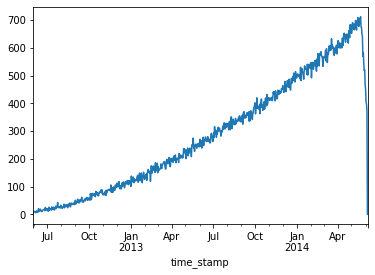

In [6]:
engagement['visited'].resample('1D').sum().plot()

In [13]:
def label_adopted(x):
  df_temp = engagement.loc[engagement['user_id'] == x]
  df_temp = df_temp.resample('D').mean()
  df_temp = df_temp.dropna()
  adopted = 0
  for i in range(len(df_temp)-2):
    if df_temp.index [i + 2] - df_temp.index[i] <= timedelta(days=7):
      adopted = 1
      break
    else:
      adopted = 0
  return adopted

In [14]:
user['adopted_user'] = user['object_id'].apply(label_adopted)

In [15]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [17]:
print(sum(user['adopted_user']))
print(sum(user.adopted_user)/len(user.object_id))

1656
0.138


In [20]:
processed = user.copy()
processed = pd.get_dummies(processed, columns = ['invited_by_user_id'], dummy_na = True)
processed = processed[['creation_source', 'opted_in_to_mailing_list','enabled_for_marketing_drip','invited_by_user_id_nan','adopted_user']]
processed.rename(columns = {'invited_by_user_id_nan':'Not_invited'}, inplace = True)
processed = pd.get_dummies(processed, columns = ['creation_source'])
display(processed.head())

,opted_in_to_mailing_list,enabled_for_marketing_drip,Not_invited,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

y = processed['adopted_user']
x = processed.drop('adopted_user', axis = 1)

Feature ranking:
1. feature 5 (0.501550)
2. feature 3 (0.139051)
3. feature 7 (0.129609)
4. feature 4 (0.067701)
5. feature 2 (0.053264)
6. feature 6 (0.046199)
7. feature 1 (0.035006)
8. feature 0 (0.027619)


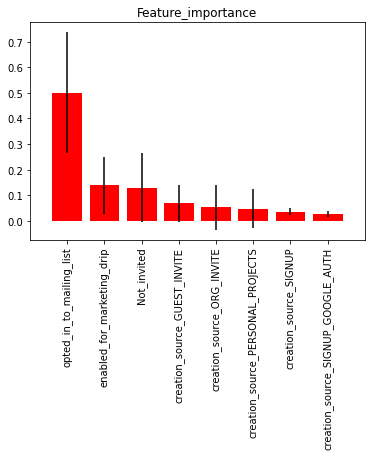

In [28]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(x,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print('Feature ranking:')

for f in range(x.shape[1]):
  print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

feature_names = x.columns

plt.figure()
plt.title('Feature_importance')
plt.bar(range(x.shape[1]), importances[indices],
        color ='r', yerr=std[indices],align='center')
plt.xticks(range(x.shape[1]),feature_names,rotation='vertical')
plt.xlim([-1,x.shape[1]])
plt.show()

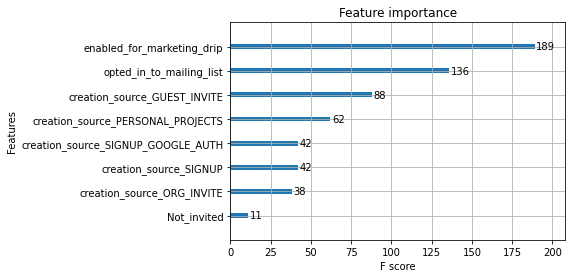

In [29]:
from xgboost.sklearn import XGBClassifierBase
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x,y)
plot_importance(model)
pyplot.show()

In [30]:
display(user.groupby('adopted_user').mean())

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
adopted_user,,,,,,
0,5993.165603,1.375596e+09,0.247970,0.148395,138.559261,5961.292839
1,6046.313406,1.395221e+09,0.259058,0.155193,162.655797,5972.618240


In [31]:
print(user['enabled_for_marketing_drip'].sum()/len(user['object_id']))

0.14933333333333335


In [32]:
active = user[user['adopted_user']==1]
notactive = user[user['adopted_user']==0]

active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 1 to 11987
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   1656 non-null   int64  
 1   creation_time               1656 non-null   object 
 2   name                        1656 non-null   object 
 3   email                       1656 non-null   object 
 4   creation_source             1656 non-null   object 
 5   last_session_creation_time  1656 non-null   float64
 6   opted_in_to_mailing_list    1656 non-null   int64  
 7   enabled_for_marketing_drip  1656 non-null   int64  
 8   org_id                      1656 non-null   int64  
 9   invited_by_user_id          943 non-null    float64
 10  adopted_user                1656 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 155.2+ KB


In [33]:
print('Percent of Adopted Users enabled for marketing drip: ' , active['enabled_for_marketing_drip'].sum()/len(active['object_id']))
print('Percent of not Adopted Users enabled for marketing drip: ' , notactive['enabled_for_marketing_drip'].sum()/len(notactive['object_id']))

Percent of Adopted Users enabled for marketing drip:  0.15519323671497584
Percent of not Adopted Users enabled for marketing drip:  0.1483952049497293


In [34]:
print('Percent of Adopted Users opted into mailing list: ' , active['opted_in_to_mailing_list'].sum()/len(active['object_id']))
print('Percent of not Adopted Users opted into mailing list: ' ,notactive['opted_in_to_mailing_list'].sum()/len(notactive['object_id']))

Percent of Adopted Users opted into mailing list:  0.25905797101449274
Percent of not Adopted Users opted into mailing list:  0.24796983758700697
